In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [4]:
np.random.seed(27)

mu_1 = np.array([5, 5])[None, ]
sigma_1 = np.array([
    [1, 0],
    [0, 1]
])

mu_2 = np.array([3, 3])[None, ]
sigma_2 = np.array([
    [1, 0],
    [0, 1]
])

n = 10

type_1 = np.random.randn(n, 2) @ sigma_1 + mu_1
type_2 = np.random.randn(n, 2) @ sigma_2 + mu_2

(0.0, 10.0)

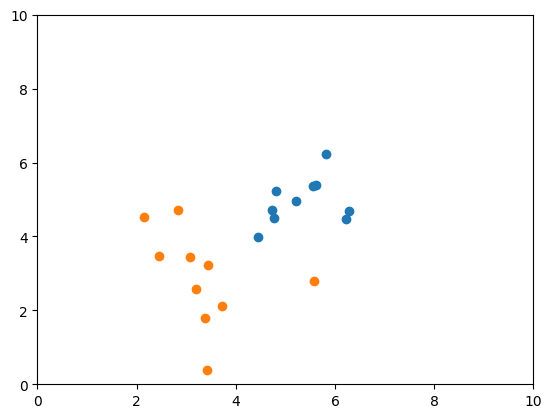

In [5]:
plt.scatter(type_1[:, 0], type_1[:, 1])
plt.scatter(type_2[:, 0], type_2[:, 1])
plt.xlim(0, 10)
plt.ylim(0, 10)

In [6]:
X = np.r_[type_1, type_2]
y = np.r_[np.zeros(n), np.ones(n)]

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

[[-1.18874514 -1.29155192]]


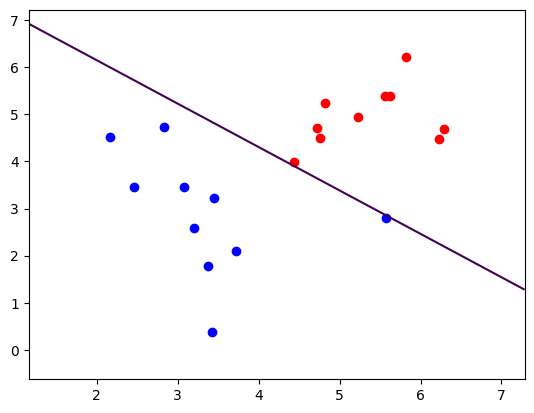

In [24]:
lr = LogisticRegression().fit(X, y)
print(lr.coef_)
DecisionBoundaryDisplay.from_estimator(lr, X, plot_method='contour', response_method="predict_proba", levels=[0.5])
plt.scatter(type_1[:, 0], type_1[:, 1], c='r')
plt.scatter(type_2[:, 0], type_2[:, 1], c='b')

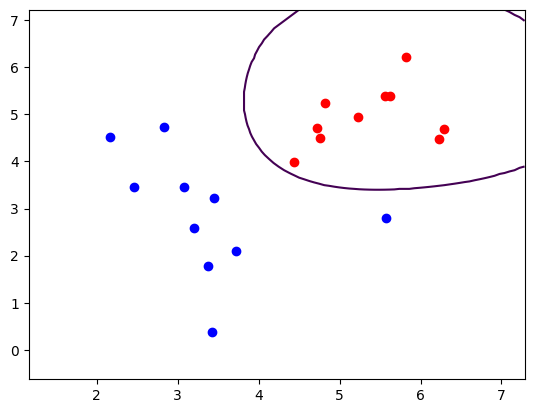

In [20]:
svc = SVC(kernel='rbf', probability=True).fit(X, y)
DecisionBoundaryDisplay.from_estimator(svc, X, plot_method='contour', response_method="predict_proba", levels=[0.5])
plt.scatter(type_1[:, 0], type_1[:, 1], c='r')
plt.scatter(type_2[:, 0], type_2[:, 1], c='b')

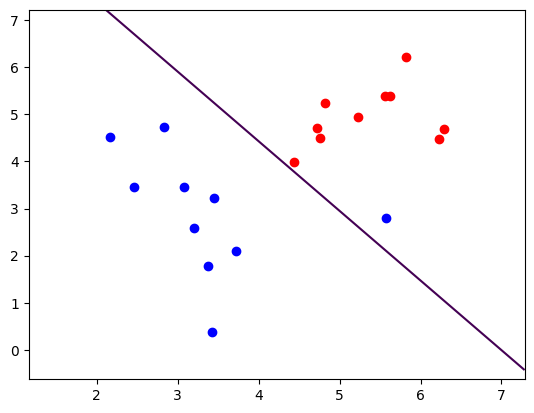

In [12]:
ldf = LinearDiscriminantAnalysis().fit(X, y)
DecisionBoundaryDisplay.from_estimator(ldf, X, plot_method='contour', response_method="predict_proba", levels=[0.5])
plt.scatter(type_1[:, 0], type_1[:, 1], c='r')
plt.scatter(type_2[:, 0], type_2[:, 1], c='b')

In [25]:
ldf.coef_

array([[-3.80529662, -2.57728483]])

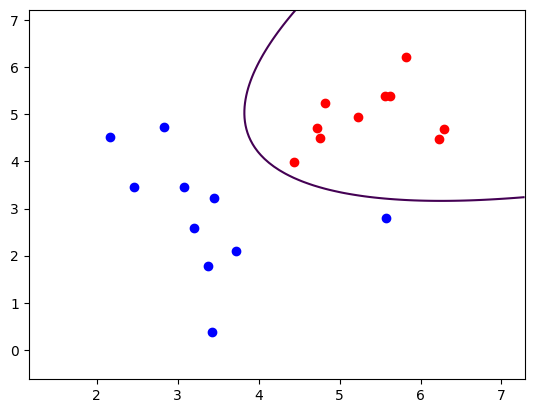

In [36]:
qdf = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)
DecisionBoundaryDisplay.from_estimator(qdf, X, plot_method='contour', response_method='predict_proba', levels=[0.5])
plt.scatter(type_1[:, 0], type_1[:, 1], c='r')
plt.scatter(type_2[:, 0], type_2[:, 1], c='b')

In [31]:
type_1.mean(axis=0)

array([5.3481482 , 4.95350037])

In [32]:
type_2.mean(axis=0)

array([3.32510144, 2.90344471])

In [39]:
np.cov(type_1, rowvar=False)

array([[0.42708674, 0.14306171],
       [0.14306171, 0.3949444 ]])

In [30]:
qdf.means_

array([[5.3481482 , 4.95350037],
       [3.32510144, 2.90344471]])

In [38]:
qdf.covariance_

[array([[0.42708674, 0.14306171],
        [0.14306171, 0.3949444 ]]),
 array([[ 0.85301121, -0.46318887],
        [-0.46318887,  1.66857999]])]

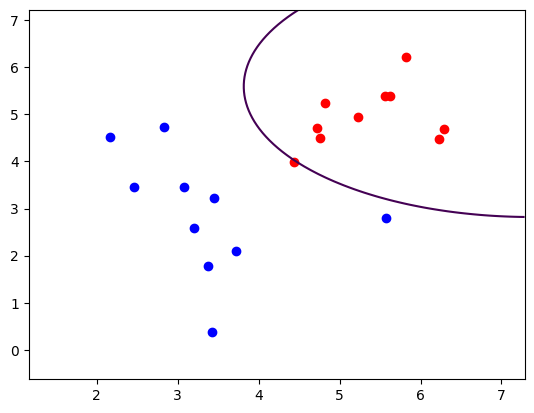

In [41]:
gnb = GaussianNB().fit(X, y)
DecisionBoundaryDisplay.from_estimator(gnb, X, plot_method='contour', response_method='predict_proba', levels=[0.5])
plt.scatter(type_1[:, 0], type_1[:, 1], c='r')
plt.scatter(type_2[:, 0], type_2[:, 1], c='b')

In [42]:
from sklearn.dummy import DummyClassifier

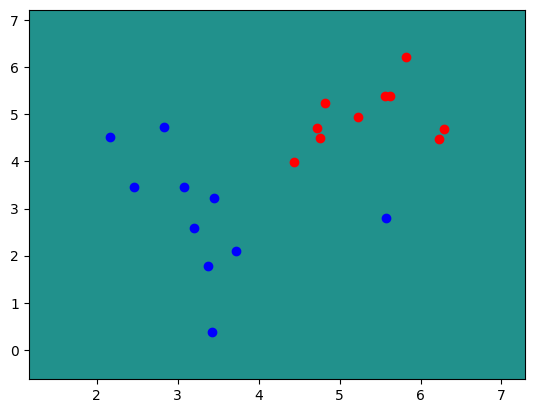

In [45]:
dc = DummyClassifier(strategy='uniform').fit(X, y)
DecisionBoundaryDisplay.from_estimator(dc, X)#, plot_method='contour', response_method='predict_proba', levels=[0.5])
plt.scatter(type_1[:, 0], type_1[:, 1], c='r')
plt.scatter(type_2[:, 0], type_2[:, 1], c='b')